# Plot the results for query strategy comparison

In [60]:
float_numbers = [
    '4903052',
    '4903054',
    '4903058',
    '4903215',
    '4903217',
    '4903218',
    '4903220'
]
float_number = float_numbers[6]

RESULT_PATH = f"../results/randomsplit/{float_number}"

QUERY_STRATEGIES = ['random', 'uncertainty']

n_initial = 100 # Replace with the desired n_initial value
k = 1  # Replace with the desired k value
split_method = 'random'
# split_method = 'ocsvm'


In [61]:
COLOR_MAP = {
        'KNN': 'red',
        'XGBoost': 'green',
        'CatBoost': 'blue',
        'LightGBM': 'purple'
    }

LINE_MAP = {
    'random': ':',
    'uncertainty': '-',
    'xxx': '--',
    'xxx': '_.'
}

In [62]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

def extract_model_name(file_path):
    # Extracts the model name from a file path
    file_name = os.path.basename(file_path)
    return file_name.split('_')[0]

def read_num_samples(file_path):
    # Reads the number of samples from a CSV file
    df = pd.read_csv(file_path)
    return df['num_samples'].values # Assuming num_samples is in the first column


def group_files_by_model_name(directory):
    # Groups the files based on the model name in the second layer of subdirectories
    grouped_files = {}
    
    subdirs = next(os.walk(directory))[1]  # Get the subdirectory names in the first layer
    
    for subdir in subdirs:
        if subdir not in QUERY_STRATEGIES: 
            continue
        
        subdir_path = os.path.join(directory, subdir)
        
        if os.path.isdir(subdir_path):
            subdir_files = glob.glob(os.path.join(subdir_path, f'*{split_method}_{n_initial}_initial_{k}_k.csv'))
            
            for file_path in subdir_files:
                model_name = os.path.basename(file_path).split('_')[0]
                
                if model_name not in grouped_files:
                    grouped_files[model_name] = {}
                
                if subdir not in grouped_files[model_name]:
                    grouped_files[model_name][subdir] = []
                
                grouped_files[model_name][subdir].append(file_path)
    
    return grouped_files

def read_f1_scores(file_paths):
    # Reads the F1 scores from CSV files
    f1_scores = []
    
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        f1_scores.append(df['F1-score'].values)  # Assuming F1 Score is in the first column
    
    return f1_scores

def plot_f1_scores(grouped_files):
    # Plot F1 scores with different query strategies, keeping one model per figure
    for model_name, query_strategies in grouped_files.items():
        f1_final_scores = {}
        plt.figure(figsize=(4,2))
        for query_strategy, file_paths in query_strategies.items(): 
            f1_scores = read_f1_scores(file_paths)[0]

            f1_final_scores[query_strategy] = f1_scores[-1]

            num_samples = read_num_samples(file_paths[0])  # Assuming all files have the same num_samples
            # plt.plot(num_samples, f1_score, label=query_strategy, linewidth=2.0, color=COLOR_MAP[model_name], linestyle = LINE_MAP[query_strategy])
            plt.plot(num_samples, f1_scores, label=query_strategy, linewidth=1.5, color='black', linestyle = LINE_MAP[query_strategy])

        plt.xlabel('# queried samples')
        plt.ylabel('F1-score')
        plt.legend(loc='best')
        # plt.grid(True)
        print(f'========== Model:{model_name}   Initial:{n_initial}   K:{k} ==========')
        print(f"Uncertainty: {f1_final_scores['uncertainty'].round(4)} ")
        print(f"Improve from random to uncertainty: {((f1_final_scores['uncertainty']/f1_final_scores['random']-1)*100).round(1)}% ")
        figure_file = os.path.join(RESULT_PATH, f'F1_{model_name}_{n_initial}_initial_{k}_k.png')
        plt.savefig(figure_file, dpi=300, bbox_inches='tight')
        plt.show()

========== Model:XGBoost   Initial:100   K:1 ==========
Uncertainty: 0.884 


KeyError: 'random'

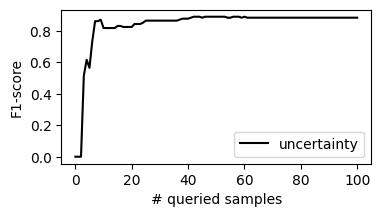

In [63]:
# Example usage
directory = RESULT_PATH  # Replace with the actual directory path

grouped_files = group_files_by_model_name(directory)

plot_f1_scores(grouped_files)


In [64]:
grouped_files

{'XGBoost': {'uncertainty': ['../results/randomsplit/4903220/uncertainty/XGBoost_random_100_initial_1_k.csv']}}

In [65]:
(8137/7989-1)*100

1.8525472524721476